In [1]:
import pandas as pd
import geopandas as gp
import numpy as np 
import os
import fiona
from statistics import mean, median
import string
import sys

## Election Results

Election results from Nevada Secretary of State (https://www.nvsos.gov/sos/elections/election-information/precinct-level-results)

## Shape Files

Precinct shapefiles primarily from the U.S. Census Bureau's 2020 Redistricting Data Program Phase 2 release. The following counties used shapefiles sourced from the respective county governments instead: Clark, Douglas, Elko, Humboldt, Lincoln, Lyon, Washoe.

## Processing

County borders in all county-sourced shapefiles were aligned to the U.S Census Bureau's boundaries. Minor adjustments were made in the Precinct 1/3 boundary of Eureka County and in the Precinct 6/5 boundary of Pershing County to match county GIS maps. Substantial revisions were made in the Fallon area of Churchill County and in the Tonopah area of Nye County to match county PDF maps.

Countywide-reported federal ballots for the U.S. Senate race in Clark, Douglas, Elko, Humboldt, Lyon, Nye, and Washoe were distributed by candidate based on the precinct-level reported vote.

## Races

G18USSDROS - Jacky Rosen (Democratic Party)
G18USSRHEL - Dean Heller (Republican Party)
G18USSLHAG - Tim Hagan (Libertarian Party)
G18USSIBAK - Kamau A. Bakari (Independent American Party)
G18USSNMIC - Barry Michaels (No Political Party)
G18USSONON - None of These Candidates

G18GOVDSIS - Steve Sisolak (Democratic Party)
G18GOVRLAX - Adam Paul Laxalt (Republican Party)
G18GOVLLOR - Jared Lord (Libertarian Party)
G18GOVIBES - Russell Best (Independent American Party)
G18GOVNBUN - Ryan Bundy (No Political Party)
G18GOVONON - None of These Candidates

G18LTGDMAR - Kate Marshall (Democratic Party)
G18LTGRROB - Michael Roberson (Republican Party)
G18LTGIHAN - Janine Hansen (Independent American Party)
G18LTGNUEH - Ed Uehling (No Political Party)
G18LTGONON - None of These Candidates

G18ATGDFOR - Aaron Ford (Democratic Party)
G18ATGRDUN - Wes Duncan (Republican Party)
G18ATGIHAN - Joel F. Hansen (Independent American Party)
G18ATGONON - None of These Candidates

G18SOSDARA - Nelson Araujo (Democratic Party)
G18SOSRCEG - Barbara K. Cegavske (Republican Party)
G18SOSONON - None of These Candidates

G18TREDCON - Zach Conine (Democratic Party)
G18TRERBEE - Bob Beers (Republican Party)
G18TREIHOG - Bill Hoge (Independent American Party)
G18TREONON - None of These Candidates

G18CONDBYR - Catherine Byrne (Democratic Party)
G18CONRKNE - Ron Knecht (Republican Party)
G18CONONON - None of These Candidates



In [2]:
vest_shp = gp.read_file("./raw-from-source/vest/nv_2018.shp")

In [3]:
vest_shp.shape

(2071, 36)

In [4]:
vest_shp.head()

,STATEFP,COUNTYFP,VTDST,NAME,G18USSDROS,G18USSRHEL,G18USSLHAG,G18USSIBAK,G18USSNMIC,G18USSONON,...,G18SOSRCEG,G18SOSONON,G18TREDCON,G18TRERBEE,G18TREIHOG,G18TREONON,G18CONDBYR,G18CONRKNE,G18CONONON,geometry
0,32,001,000014,CHURCHILL PRECINCT 14,77,392,5,0,4,10,...,388,15,74,383,16,12,76,395,14,"POLYGON Z ((-119.06227 39.34643 0.00000, -119...."
1,32,001,000019,CHURCHILL PRECINCT 19,85,361,7,1,8,13,...,374,13,90,356,13,16,92,369,12,"POLYGON Z ((-119.11763 39.50918 0.00000, -119...."
2,32,009,000001,ESMERALDA GOLDFIELD PRECINCT 1,27,116,8,2,7,11,...,131,14,29,125,5,12,34,119,16,"POLYGON Z ((-117.43051 37.78696 0.00000, -117...."
3,32,009,000002,ESMERALDA SILVER PEAK PRECINCT 2,1,31,2,0,0,1,...,30,2,1,29,3,1,4,27,4,"POLYGON Z ((-117.87888 37.91707 0.00000, -117...."
4,32,009,000003,ESMERALDA FISH LAKE VALLEY PRECINCT 3,21,118,0,1,2,5,...,115,5,22,115,7,2,27,111,6,"POLYGON Z ((-118.42300 37.89637 0.00000, -118...."


<AxesSubplot:>

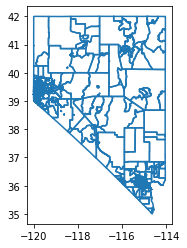

In [5]:
vest_shp.boundary.plot()

<AxesSubplot:>

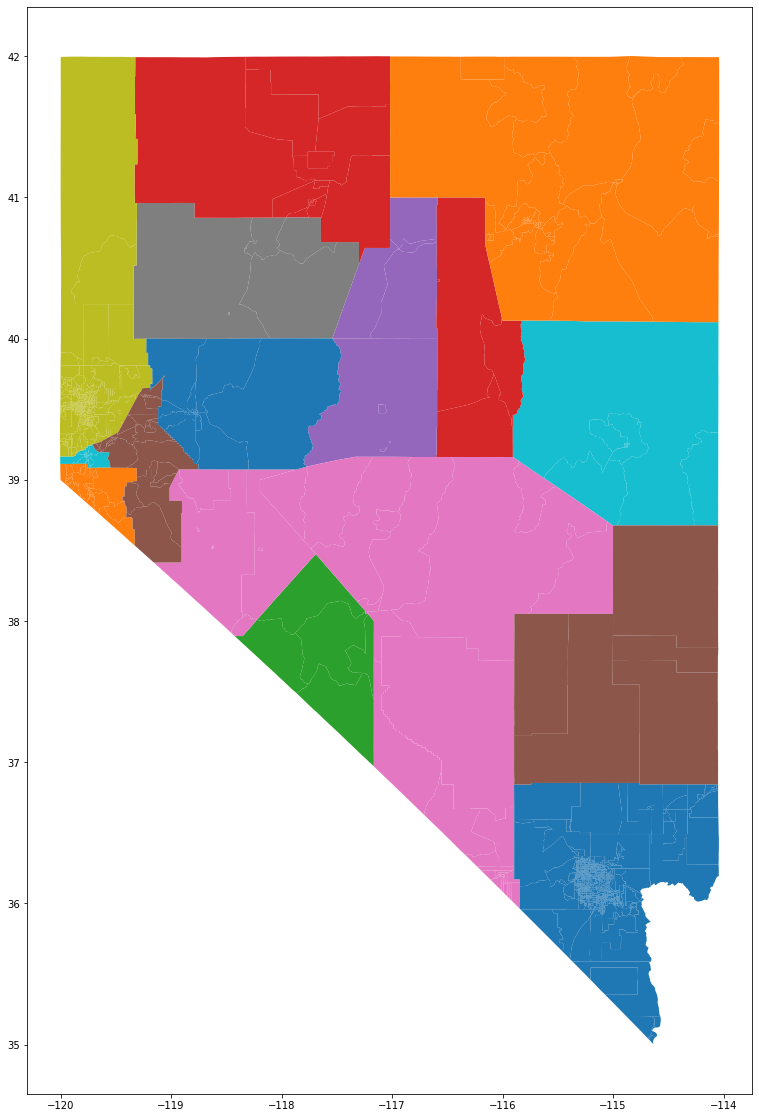

In [6]:
vest_shp.plot(column='COUNTYFP', figsize=(20,20))

In [7]:
vest_shp.columns

Index(['STATEFP', 'COUNTYFP', 'VTDST', 'NAME', 'G18USSDROS', 'G18USSRHEL',
       'G18USSLHAG', 'G18USSIBAK', 'G18USSNMIC', 'G18USSONON', 'G18GOVDSIS',
       'G18GOVRLAX', 'G18GOVLLOR', 'G18GOVIBES', 'G18GOVNBUN', 'G18GOVONON',
       'G18LTGDMAR', 'G18LTGRROB', 'G18LTGIHAN', 'G18LTGNUEH', 'G18LTGONON',
       'G18ATGDFOR', 'G18ATGRDUN', 'G18ATGIHAN', 'G18ATGONON', 'G18SOSDARA',
       'G18SOSRCEG', 'G18SOSONON', 'G18TREDCON', 'G18TRERBEE', 'G18TREIHOG',
       'G18TREONON', 'G18CONDBYR', 'G18CONRKNE', 'G18CONONON', 'geometry'],
      dtype='object')

## Load the SOS Election Results File

In [8]:
nv_18 = pd.read_csv("./raw-from-source/source/Precinct Results 2018 General Election.csv", index_col=False, low_memory = False)

In [9]:
nv_18.head()

,2018 Statewide General Election Results,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Note: In cases where the cumulative turnout fo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Jurisdiction,Precinct,Contest,Selection,Votes,NaN,NaN,NaN,NaN,NaN
2,Carson City,101,Attorney General,"DUNCAN, WES",385,NaN,NaN,NaN,NaN,NaN
3,Carson City,101,Attorney General,"FORD, AARON",327,NaN,NaN,NaN,NaN,NaN
4,Carson City,101,Attorney General,"Hansen, Joel F.",40,NaN,NaN,NaN,NaN,NaN


In [10]:
nv_18.columns = nv_18.iloc[1]
nv_18 = nv_18[2:]
nv_18 = nv_18.iloc[:,:-5]
nv_18.head()


1,Jurisdiction,Precinct,Contest,Selection,Votes
2,Carson City,101,Attorney General,"DUNCAN, WES",385
3,Carson City,101,Attorney General,"FORD, AARON",327
4,Carson City,101,Attorney General,"Hansen, Joel F.",40
5,Carson City,101,Attorney General,None Of These Candidates,18
6,Carson City,101,Board of Supervisors,"Giomi, Stacey",487


## Clean Up the Elections Results

In [11]:
#filter rows with presidential, Senatorial, and Corporate Commissioner results
filtered_18 = nv_18.loc[(nv_18['Contest']== 'Governor') 
                        | (nv_18['Contest']== 'Attorney General')
                        | (nv_18['Contest']== 'Lieutenant Governor')
                        | (nv_18['Contest']== 'Secretary Of State')
                        | (nv_18['Contest']== 'State Treasurer')
                        | (nv_18['Contest']== 'State Controller')
                        | (nv_18['Contest']== 'United States Senator')]
filtered_18.reset_index(drop=True, inplace = True)
#filtered_20.to_csv('filtered.csv')
nv_unq = nv_18['Contest'].value_counts()


In [12]:
filtered_18['Votes'] = filtered_18['Votes'].astype(int)
#filtered_18.to_csv('./filtered1.csv')


<ipython-input-12-dc42a90509c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_18['Votes'] = filtered_18['Votes'].astype(int)


In [13]:
#Creating unique values for None Of These Candidates for each race
df_filtered_senate = filtered_18[(filtered_18['Selection']=='None Of These Candidates')]
df_filtered_senate1 = df_filtered_senate[((df_filtered_senate["Contest"]=='United States Senator'))]
df_filtered_senate1['Selection'] = df_filtered_senate1['Selection'].str.replace('None Of These Candidates','None Of These Candidates For Senate')

df_filtered_gov = filtered_18[(filtered_18['Selection']=='None Of These Candidates')]
df_filtered_gov1 = df_filtered_gov[((df_filtered_gov["Contest"]=='Governor'))]
df_filtered_gov1['Selection'] = df_filtered_gov1['Selection'].str.replace('None Of These Candidates','None Of These Candidates For Governor')


df_filtered_ltgov = filtered_18[(filtered_18['Selection']=='None Of These Candidates')]
df_filtered_ltgov1 = df_filtered_ltgov[((df_filtered_ltgov["Contest"]=='Lieutenant Governor'))]
df_filtered_ltgov1['Selection'] = df_filtered_ltgov1['Selection'].str.replace('None Of These Candidates','None Of These Candidates For Lieutenant Governor')

df_filtered_atg = filtered_18[(filtered_18['Selection']=='None Of These Candidates')]
df_filtered_atg1 = df_filtered_atg[((df_filtered_atg["Contest"]=='Attorney General'))]
df_filtered_atg1['Selection'] = df_filtered_atg1['Selection'].str.replace('None Of These Candidates','None Of These Candidates For Attorney General')

df_filtered_sos = filtered_18[(filtered_18['Selection']=='None Of These Candidates')]
df_filtered_sos1 = df_filtered_sos[((df_filtered_sos["Contest"]=='Secretary Of State'))]
df_filtered_sos1['Selection'] = df_filtered_sos1['Selection'].str.replace('None Of These Candidates','None Of These Candidates For Secretary Of State')

df_filtered_tre = filtered_18[(filtered_18['Selection']=='None Of These Candidates')]
df_filtered_tre1 = df_filtered_tre[((df_filtered_tre["Contest"]=='State Treasurer'))]
df_filtered_tre1['Selection'] = df_filtered_tre1['Selection'].str.replace('None Of These Candidates','None Of These Candidates For State Treasurer')

df_filtered_con = filtered_18[(filtered_18['Selection']=='None Of These Candidates')]
df_filtered_con1 = df_filtered_con[((df_filtered_con["Contest"]=='State Controller'))]
df_filtered_con1['Selection'] = df_filtered_con1['Selection'].str.replace('None Of These Candidates','None Of These Candidates For State Controller')


filtered_18.update(df_filtered_senate1, join='left')
filtered_18.update(df_filtered_gov1, join='left')
filtered_18.update(df_filtered_ltgov1, join='left')
filtered_18.update(df_filtered_atg1, join='left')
filtered_18.update(df_filtered_sos1, join='left')
filtered_18.update(df_filtered_tre1, join='left')
filtered_18.update(df_filtered_con1, join='left')

<ipython-input-13-53cadef247b8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_senate1['Selection'] = df_filtered_senate1['Selection'].str.replace('None Of These Candidates','None Of These Candidates For Senate')
<ipython-input-13-53cadef247b8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_gov1['Selection'] = df_filtered_gov1['Selection'].str.replace('None Of These Candidates','None Of These Candidates For Governor')
<ipython-input-13-53cadef247b8>:13: SettingWithCopyWarning: 
A

In [14]:
filtered_18.to_csv('./filteredall.csv')

In [15]:
#pivoting based on cand_name and precinct vote totals
pivot_df = pd.pivot_table(filtered_18, index = ['Precinct','Jurisdiction'], columns = 'Selection', values='Votes')

#dropping and renaming columns to match VEST

pivot_df = pivot_df.rename(columns={'ROSEN, JACKY':'G18USSDROS',
                                    'Heller, Dean':'G18USSRHEL',
                                    'HAGAN, TIM':'G18USSLHAG',
                                    'BAKARI, KAMAU A.':'G18USSIBAK',
                                    'MICHAELS, BARRY':'G18USSNMIC',
                                    'None Of These Candidates For Senate':'G18USSONON',
                                    'SISOLAK, STEVE':'G18GOVDSIS',
                                    'LAXALT, ADAM PAUL':'G18GOVRLAX',
                                    'LORD, JARED':'G18GOVLLOR',
                                    'BEST, RUSSELL':'G18GOVIBES',
                                    'BUNDY, RYAN':'G18GOVNBUN',
                                    'None Of These Candidates For Governor':'G18GOVONON',
                                    'MARSHALL, KATE':'G18LTGDMAR',
                                    'ROBERSON, MICHAEL':'G18LTGRROB',
                                    'HANSEN, JANINE':'G18LTGIHAN',
                                    'UEHLING, ED':'G18LTGNUEH',
                                    'None Of These Candidates For Lieutenant Governor':'G18LTGONON',
                                    'FORD, AARON':'G18ATGDFOR',
                                    'DUNCAN, WES':'G18ATGRDUN',
                                    'Hansen, Joel F.':'G18ATGIHAN',
                                    'None Of These Candidates For Attorney General':'G18ATGONON',
                                    'ARAUJO, NELSON':'G18SOSDARA',
                                    'Cegavske, Barbara K.':'G18SOSRCEG',
                                    'None Of These Candidates For Secretary Of State':'G18SOSONON',
                                    'CONINE, ZACH':'G18TREDCON',
                                    'BEERS, BOB':'G18TRERBEE',
                                    'HOGE, BILL':'G18TREIHOG',
                                    'None Of These Candidates For State Treasurer':'G18TREONON',
                                    'BYRNE, CATHERINE':'G18CONDBYR',
                                    'Knecht, Ron':'G18CONRKNE',
                                    'None Of These Candidates For State Controller':'G18CONONON'})
pivot_df = pivot_df[['G18USSDROS','G18USSRHEL','G18USSLHAG','G18USSIBAK','G18USSNMIC','G18USSONON','G18GOVDSIS','G18GOVRLAX','G18GOVLLOR','G18GOVIBES','G18GOVNBUN','G18GOVONON','G18LTGDMAR','G18LTGRROB','G18LTGIHAN','G18LTGNUEH','G18LTGONON','G18ATGDFOR','G18ATGRDUN','G18ATGIHAN','G18ATGONON','G18SOSDARA','G18SOSRCEG','G18SOSONON','G18TREDCON','G18TRERBEE','G18TREIHOG','G18TREONON','G18CONDBYR','G18CONRKNE','G18CONONON']]
pivot_df.reset_index(inplace=True)
pivot_df

Selection,Precinct,Jurisdiction,G18USSDROS,G18USSRHEL,G18USSLHAG,G18USSIBAK,G18USSNMIC,G18USSONON,G18GOVDSIS,G18GOVRLAX,...,G18SOSDARA,G18SOSRCEG,G18SOSONON,G18TREDCON,G18TRERBEE,G18TREIHOG,G18TREONON,G18CONDBYR,G18CONRKNE,G18CONONON
0,01-1 - Centerville,Douglas,107.0,308.0,4.0,2.0,5.0,4.0,107.0,310.0,...,103.0,310.0,9.0,98.0,305.0,8.0,16.0,109.0,305.0,13.0
1,01-2 - Centerville,Douglas,49.0,174.0,2.0,1.0,4.0,3.0,49.0,170.0,...,42.0,180.0,7.0,44.0,177.0,1.0,6.0,47.0,178.0,7.0
2,01-Centerville,Douglas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,01_East Mason Valley 1,Lyon,111.0,348.0,7.0,5.0,13.0,13.0,104.0,338.0,...,113.0,358.0,20.0,113.0,342.0,16.0,22.0,130.0,346.0,18.0
4,02-1 - Fish Springs,Douglas,146.0,455.0,7.0,4.0,2.0,10.0,137.0,464.0,...,129.0,464.0,13.0,129.0,464.0,12.0,11.0,135.0,466.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2055,SMOKY VALLEY 35,Nye,14.0,207.0,3.0,2.0,4.0,2.0,16.0,191.0,...,18.0,207.0,6.0,14.0,205.0,8.0,5.0,22.0,204.0,5.0
2056,SUNNYSIDE 13,Nye,4.0,10.0,0.0,0.0,0.0,0.0,4.0,8.0,...,4.0,8.0,2.0,4.0,8.0,1.0,1.0,4.0,8.0,2.0
2057,Southern Lander County 06,Lander,4.0,52.0,0.0,0.0,0.0,1.0,4.0,52.0,...,2.0,54.0,3.0,4.0,49.0,2.0,4.0,4.0,54.0,1.0
2058,TONOPAH 14,Nye,150.0,536.0,14.0,6.0,4.0,20.0,120.0,552.0,...,122.0,581.0,24.0,138.0,528.0,25.0,33.0,157.0,530.0,37.0


In [16]:
#uploading national FIPS codes to apply back to file
FIPS = pd.read_csv('./raw-from-source/FIPS/US_FIPS_Codes.csv')
FIPS = FIPS[FIPS['State'] == 'Nevada']
FIPS1 = FIPS.drop(['State','FIPS State'],axis=1)

#adding leading zeroes to FIPS data
FIPS1['FIPS County'] = FIPS1['FIPS County'].apply(lambda x:'{0:0>3}'.format(x))
FIPS1['Jurisdiction'] = FIPS1['County Name']
FIPS1.reset_index(inplace=True)
FIPS1 = FIPS1.drop(['index'],axis=1)
FIPS1 = FIPS1.iloc[: , 1:]

#lower case all precinct names and merge with county fps
pivot_df['Precinct'] = pivot_df['Precinct'].str.lower()
pivot_df = pivot_df.merge(FIPS1, how='left', on='Jurisdiction')


In [17]:

vest_shp['FIPS County'] = vest_shp['COUNTYFP']
vest_shp = vest_shp.merge(FIPS1, how='outer', on='FIPS County')


In [18]:
#remove non-alphanumeric characters
def alphanum(element):
    
    return "".join(filter(str.isalnum, element))
pivot_df.loc[:,'NAME'] = [alphanum(x) for x in pivot_df['Precinct']]
pivot_df['unq_id'] = pivot_df["Precinct"] + " " + pivot_df["FIPS County"]


In [19]:
#creating a unique id out of precinct name and county fp
vest_shp = vest_shp.iloc[:,:-1]
vest_shp['NAME'] = vest_shp['NAME'].str.lower()
vest_shp['NAME'] = vest_shp['NAME'].astype(str)
vest_shp.loc[:,'NAME'] = [alphanum(x) for x in vest_shp['NAME']]
vest_shp['unq_id'] = vest_shp["NAME"] + " " + vest_shp["COUNTYFP"]

In [20]:
#join on unique id lots of unmatched places
join_1 = pd.merge(pivot_df, vest_shp, how="outer",on='unq_id', indicator = True, validate="1:1")
join_1["_merge"].value_counts()


both          1134
right_only     937
left_only      926
Name: _merge, dtype: int64

## Dictionary for joining 

In [21]:
preliminary_dict = {"precinct1centerville":"precinct1centerville 1-2",
"005 precinct2fishsprings":"005 precinct2fishsprings 1-2",
"005 precinct3gardnerville":"005 precinct3gardnerville 1-2",
"005 precinct6jacksvalley":"005 precinct6jacksvalley 1-2",
"005 precinct7minden":"005 precinct7minden 1-2",
"005 precinct8ranchosi":"005 precinct8ranchosi 1-2",
"005 precinct13indianhillswest":"005 precinct13indianhillswest 1-2",
"005 precinct18ranchosiii":"005 precinct18ranchosiii 1-2",
"005 precinct23indianhillseast":"005 precinct23indianhillseast 1-2",
"005 precinct25pleasantview":"005 precinct25pleasantview 1-2",
"005 precinct27winhaven":"005 precinct27winhaven 1-2",
"005 precinct28orchardroad":"005 precinct28orchardroad 1-3",
"005 precinct37zephyrcove":"005 precinct37zephyrcove 1-2",
"005 precinct38roundhill":"005 precinct38roundhill 1-2",
"005 precinct40kingsbury":"005 precinct40kingsbury 1-2",
"005 precinct41daggett":"005 precinct41daggett 1-2",
"013 humboldtprecinct14":"013 humboldtprecinct14 consolidated",
"013 humboldtwinnemuccaprecinct4":"013 humboldtwinnemuccaprecinct4 consolidated",
"013 humboldtwinnemuccaprecinct5":"013 humboldtwinnemuccaprecinct5 consolidated",
"017 precinct2caliente":"017 precinct2caliente consolidated",
"019 fernley12":"019 fernley12 consolidated",
"019 fernley13":"019 fernley13 consolidated",
"019 fernley14":"019 fernley14 consolidated"}


In [22]:
#Use the dictionary to change the names
pivot_df["unq_id"]=pivot_df["unq_id"].map(preliminary_dict).fillna(pivot_df["unq_id"])

In [23]:
vest_dict = {"005 precinct13indianhillswest":"005 precinct13indianhillswest 1-2",
"005 precinct18ranchosiii":"005 precinct18ranchosiii 1-2",
"005 precinct1centerville":"precinct1centerville 1-2",
"005 precinct23indianhillseast":"005 precinct23indianhillseast 1-2",
"005 precinct25pleasantview":"005 precinct25pleasantview 1-2",
"005 precinct27winhaven":"005 precinct27winhaven 1-2",
"005 precinct28orchardroad":"005 precinct28orchardroad 1-3",
"005 precinct2fishsprings":"005 precinct2fishsprings 1-2",
"005 precinct30eastfork":"005 30-east fork",
"005 precinct37zephyrcove":"005 precinct37zephyrcove 1-2",
"005 precinct38roundhill":"005 precinct38roundhill 1-2",
"005 precinct3gardnerville":"005 precinct3gardnerville 1-2",
"005 precinct40kingsbury":"005 precinct40kingsbury 1-2",
"005 precinct41daggett":"005 precinct41daggett 1-2",
"005 precinct6jacksvalley":"005 precinct6jacksvalley 1-2",
"005 precinct7minden":"005 precinct7minden 1-2",
"005 precinct8ranchosi":"005 precinct8ranchosi 1-2",
"013 humboldtprecinct14":"013 humboldtprecinct14 consolidated",
"013 humboldtwinnemuccaprecinct4":"013 humboldtwinnemuccaprecinct4 consolidated",
"013 humboldtwinnemuccaprecinct5":"013 humboldtwinnemuccaprecinct5 consolidated",
"017 precinct2caliente":"017 precinct2caliente consolidated",
"019 fernley12":"019 fernley12 consolidated",
"019 fernley13":"019 fernley13 consolidated",
"019 fernley14":"019 fernley14 consolidated"}

In [24]:
#Use the dictionary to change the names
vest_shp["unq_id"]=vest_shp["unq_id"].map(vest_dict).fillna(vest_shp["unq_id"])

In [25]:
final_dict = {"001 precinct 01":"001 churchillprecinct01",
"001 precinct 02":"001 churchillprecinct02",
"001 precinct 03":"001 churchillprecinct03",
"001 precinct 04":"001 churchillprecinct04",
"001 precinct 05":"001 churchillprecinct05",
"001 precinct 06":"001 churchillprecinct06",
"001 precinct 07":"001 churchillprecinct07",
"001 precinct 08":"001 churchillprecinct08",
"001 precinct 09":"001 churchillprecinct09",
"001 precinct 10":"001 churchillprecinct10",
"001 precinct 11":"001 churchillprecinct11",
"001 precinct 12":"001 churchillprecinct12",
"001 precinct 13":"001 churchillprecinct13",
"001 precinct 14":"001 churchillprecinct14",
"001 precinct 15":"001 churchillprecinct15",
"001 precinct 16":"001 churchillprecinct16",
"001 precinct 17":"001 churchillprecinct17",
"001 precinct 18":"001 churchillprecinct18",
"001 precinct 19":"001 churchillprecinct19",
"005 01-1 - centerville":"precinct1centerville 1-2",
"005 01-2 - centerville":"precinct1centerville 1-2",
"005 02-1 - fish springs":"005 precinct2fishsprings 1-2",
"005 02-2 - fish springs":"005 precinct2fishsprings 1-2",
"005 03-1 - gardnerville":"005 precinct3gardnerville 1-2",
"005 03-2 - gardnerville":"005 precinct3gardnerville 1-2",
"005 04-carson valley estates":"005 precinct4carsonvalleyestates",
"005 05-genoa":"005 precinct5genoa",
"005 06-1 - jacks valley":"005 precinct6jacksvalley 1-2",
"005 06-3 - jacks valley":"005 precinct6jacksvalley 1-2",
"005 07-1 - minden":"005 precinct7minden 1-2",
"005 07-2 - minden":"005 precinct7minden 1-2",
"005 08-1 - ranchos i":"005 precinct8ranchosi 1-2",
"005 08-3 - ranchos i":"005 precinct8ranchosi 1-2",
"005 09-ranchos ii":"005 precinct9ranchosii",
"005 10-tre":"005 precinct10topazranchestates",
"005 11-johnson lane":"005 precinct11johnsonlane",
"005 12-dresslerville":"005 precinct12dresslerville",
"005 13-1 - indian hills - west":"005 precinct13indianhillswest 1-2",
"005 13-2 - indian hills - west":"005 precinct13indianhillswest 1-2",
"005 14-pinenut":"005 precinct14pinenut",
"005 15-valley":"005 precinct15valley",
"005 16-mottsville":"005 precinct16mottsville",
"005 17-ruhenstroth":"005 precinct17ruhenstroth",
"005 18-1 - ranchos iii-2":"005 precinct18ranchosiii 1-2",
"005 18-2 - ranchos iii-2":"005 precinct18ranchosiii 1-2",
"005 19-ranchos iv":"005 precinct19ranchosiv",
"005 20-birch/ranchos":"005 precinct20birchranchos",
"005 21-wildhorse":"005 precinct21wildhorse",
"005 22-saratoga":"005 precinct22saratoga",
"005 23-1 - indian hills - east":"005 precinct23indianhillseast 1-2",
"005 23-2 - indian hills - east":"005 precinct23indianhillseast 1-2",
"005 24-topaz lake":"005 precinct24topazlake",
"005 25-1 - pleasantview":"005 precinct25pleasantview 1-2",
"005 25-2 - pleasantview":"005 precinct25pleasantview 1-2",
"005 26-westwood":"005 precinct26westwood",
"005 27-1 - winhaven":"005 precinct27winhaven 1-2",
"005 27-2 - winhaven":"005 precinct27winhaven 1-2",
"005 28-1 - orchard road":"005 precinct28orchardroad 1-3",
"005 28-2 - orchard road":"005 precinct28orchardroad 1-3",
"005 28-3 - orchard road":"005 precinct28orchardroad 1-3",
"005 29-autumn hils":"005 precinct29autumnhills",
"005 31-chichester":"005 precinct31chichester",
"005 32-east valley":"005 precinct32eastvalley",
"005 33-hot springs":"005 precinct33hotsprings",
"005 34-sunridge":"005 precinct34sunridge",
"005 35-glenbrook":"005 precinct35glenbrook",
"005 36-skyland":"005 precinct36skyland",
"005 37-1 - zephyr cove":"005 precinct37zephyrcove 1-2",
"005 37-6 - zephyr cove":"005 precinct37zephyrcove 1-2",
"005 38-1 - round hill":"005 precinct38roundhill 1-2",
"005 38-2 - round hill":"005 precinct38roundhill 1-2",
"005 39-edgewood":"005 precinct39edgewood",
"005 40-1 - kingsbury":"005 precinct40kingsbury 1-2",
"005 40-2 - kingsbury":"005 precinct40kingsbury 1-2",
"005 41-1 - daggett":"005 precinct41daggett 1-2",
"005 41-2 - daggett":"005 precinct41daggett 1-2",
"007 precinct 1":"007 elkovtd1elkocity1",
"007 precinct 10":"007 elkovtd10elkocity10",
"007 precinct 11":"007 elkovtd11elkocity11",
"007 precinct 12":"007 elkovtd12elkoruralnorth",
"007 precinct 13":"007 elkovtd13elkoruralsouth",
"007 precinct 14":"007 elkovtd14elkocity14",
"007 precinct 15":"007 elkovtd15carlin2",
"007 precinct 16":"007 elkovtd16carlin1",
"007 precinct 17":"007 elkovtd17carlinrural",
"007 precinct 18":"007 elkovtd18wells1",
"007 precinct 19":"007 elkovtd19wells2",
"007 precinct 2":"007 elkovtd2elkocity2",
"007 precinct 20":"007 elkovtd20wendovernorth",
"007 precinct 21":"007 elkovtd21wendoversouth",
"007 precinct 22":"007 elkovtd22springcreeksouth",
"007 precinct 23":"007 elkovtd23springcreek",
"007 precinct 24":"007 elkovtd24springcreekmobile1",
"007 precinct 25":"007 elkovtd25springcreekmobile2",
"007 precinct 26":"007 elkovtd26lamoille",
"007 precinct 27":"007 elkovtd27moundvalley",
"007 precinct 28":"007 elkovtd28jackcreek",
"007 precinct 29":"007 elkovtd29owyhee",
"007 precinct 3":"007 elkovtd3elkocity3",
"007 precinct 30":"007 elkovtd30mountaincity",
"007 precinct 31":"007 elkovtd31northfork",
"007 precinct 32":"007 elkovtd32ryndon",
"007 precinct 33":"007 elkovtd33marysriver",
"007 precinct 34":"007 elkovtd34starrvalley",
"007 precinct 35":"007 elkovtd35rubyvalley",
"007 precinct 36":"007 elkovtd36clovervalley",
"007 precinct 37":"007 elkovtd37oasiswinecup",
"007 precinct 38":"007 elkovtd38jackpot",
"007 precinct 39":"007 elkovtd39montello",
"007 precinct 4":"007 elkovtd4elkocity4",
"007 precinct 40":"007 elkovtd40springcreek",
"007 precinct 41":"007 elkovtd41springcreeknorth",
"007 precinct 5":"007 elkovtd5elkocity5",
"007 precinct 6":"007 elkovtd6elkocity6",
"007 precinct 7":"007 elkovtd7elkocity7",
"007 precinct 8":"007 elkovtd8elkocity8",
"007 precinct 9":"007 elkovtd9elkocity9",
"009 precinct 1":"009 esmeraldagoldfieldprecinct1",
"009 precinct 2":"009 esmeraldasilverpeakprecinct2",
"009 precinct 3":"009 esmeraldafishlakevalleyprecinct3",
"009 precinct 4":"009 esmeraldagoldpointlidaprecinct4",
"009 precinct 5":"009 esmeraldalambertucciprecinct5",
"011 precinct 1":"011 precinct1",
"011 precinct 2":"011 precinct2",
"011 precinct 3":"011 precinct3",
"011 precinct 4":"011 precinct4crescentvalleytown",
"013 precinct 1":"013 humboldtwinnemuccaprecinct1",
"013 precinct 10":"013 10",
"013 precinct 11":"013 11",
"013 precinct 12":"013 12",
"013 precinct 13":"013 13",
"013 precinct 14 - city":"013 humboldtprecinct14 consolidated",
"013 precinct 14 - county":"013 humboldtprecinct14 consolidated",
"013 precinct 15":"013 humboldtprecinct15",
"013 precinct 2":"013 humboldtwinnemuccaprecinct2",
"013 precinct 3":"013 humboldtwinnemuccaprecinct3",
"013 precinct 4 - city":"013 humboldtwinnemuccaprecinct4 consolidated",
"013 precinct 4 - county":"013 humboldtwinnemuccaprecinct4 consolidated",
"013 precinct 5 - city":"013 humboldtwinnemuccaprecinct5 consolidated",
"013 precinct 5 - county":"013 humboldtwinnemuccaprecinct5 consolidated",
"013 precinct 6":"013 6",
"013 precinct 7":"013 humboldtprecinct7",
"013 precinct 8":"013 8",
"013 precinct 9":"013 9",
"015 argenta 01":"015 precinctno1argenta",
"015 argenta 02":"015 precinctno2argenta",
"015 argenta 03":"015 precinctno3argenta",
"015 argenta 04":"015 precinctno4argenta",
"015 argenta 05":"015 precinctno5argenta",
"015 austin 07":"015 precinctno7austin",
"015 gillman springs ranch 08":"015 precinctno8gilmanspringsranch",
"015 kingston 09":"015 precinctno9kingston",
"015 southern lander county 06":"015 precinctno6southernlandercounty",
"017 1 - alamo":"017 precinct1alamo",
"017 2 - caliente-0":"017 precinct2caliente consolidated",
"017 2 - caliente-1":"017 precinct2caliente consolidated",
"017 3 - panaca":"017 precinct3panaca",
"017 4 - pioche":"017 precinct4pioche",
"017 5 - rachel":"017 precinct5rachel",
"019 01_east mason valley 1":"019 eastmasonvalley1",
"019 02_east mason valley 2":"019 eastmasonvalley2",
"019 03_west mason valley 1":"019 westmasonvalley1",
"019 04_west mason valley 2":"019 westmasonvalley2",
"019 05_west mason valley 3":"019 westmasonvalley3",
"019 06_spragg-plummer":"019 spraggplummer",
"019 07_smith valley 1":"019 smithvalley1",
"019 08_smith valley 2":"019 smithvalley2",
"019 09_south dayton 1":"019 southdayton1",
"019 10_south dayton 2":"019 southdayton2",
"019 11_south dayton 3":"019 southdayton3",
"019 12_south dayton 4":"019 southdayton4",
"019 13_north dayton 1":"019 northdayton1",
"019 14_north dayton 2":"019 northdayton2",
"019 15_north dayton 3":"019 northdayton3",
"019 16_north dayton 4":"019 northdayton4",
"019 17_north dayton 5":"019 northdayton5",
"019 18_mound house 1":"019 moundhouse1",
"019 19_mound house 2":"019 moundhouse2",
"019 20_silver city":"019 silvercity",
"019 21_stagecoach 1":"019 stagecoach1",
"019 22_stagecoach 2":"019 stagecoach2",
"019 23_silver springs 1":"019 silversprings1",
"019 24_silver springs 2":"019 silversprings2",
"019 25_silver springs 3":"019 silversprings3",
"019 26_silver springs 4":"019 silversprings4",
"019 27_fernley 1 - in city":"019 fernley1",
"019 28_fernley 2 - in city":"019 fernley2",
"019 29_fernley 3 - in city":"019 fernley3",
"019 30_fernley 4 - in city":"019 fernley4",
"019 31_fernley 5 - in city":"019 fernley5",
"019 32_fernley 6 - in city":"019 fernley6",
"019 33_fernley 7 - in city":"019 fernley7",
"019 34_fernley 8 - in city":"019 fernley8",
"019 35_fernley 9 - in city":"019 fernley9",
"019 36_fernley 10 - in city":"019 fernley10",
"019 37_fernley 11 - in city":"019 fernley11",
"019 38_fernley 12 - in city":"019 fernley12 consolidated",
"019 38_fernley 12 - out of city":"019 fernley12 consolidated",
"019 39_fernley 13 - in city":"019 fernley13 consolidated",
"019 39_fernley 13 - out of city":"019 fernley13 consolidated",
"019 40_fernley 14- in city":"019 fernley14 consolidated",
"021 precinct 1":"021 hawthorneprecinct1",
"021 precinct 10":"021 montgomerypassprecinct10",
"021 precinct 11":"021 schurzprecinct11",
"021 precinct 12":"021 walkerlakeprecinct12",
"021 precinct 2":"021 hawthorneprecinct2",
"021 precinct 3":"021 hawthorneprecinct3",
"021 precinct 4":"021 hawthorneprecinct4",
"021 precinct 5":"021 hawthorneprecinct5",
"021 precinct 6":"021 hawthorneprecinct6",
"021 precinct 7":"021 hawthorneruralprecinct7",
"021 precinct 8":"021 luningprecinct8",
"021 precinct 9":"021 minaprecinct9",
"023 amargosa vly 06":"023 amargosavalley06",
"023 beatty 01":"023 beatty01",
"023 currant 02":"023 currantcreek02",
"023 duckwater 03":"023 duckwater03",
"023 forty bar 18":"023 fortybar18",
"023 gabbs 04":"023 gabbs04",
"023 ione 05":"023 ione05",
"023 manhattan 07":"023 manhattan07",
"023 mercury 08":"023 mercury08",
"023 pahrump 09":"023 pahrump09",
"023 pahrump 10":"023 pahrump10",
"023 pahrump 11":"023 pahrump11",
"023 pahrump 16":"023 pahrump16",
"023 pahrump 17":"023 pahrump17",
"023 pahrump 19":"023 pahrump19",
"023 pahrump 20":"023 pahrump20",
"023 pahrump 21":"023 pahrump21",
"023 pahrump 22":"023 pahrump22",
"023 pahrump 23":"023 pahrump23",
"023 pahrump 24":"023 pahrump24",
"023 pahrump 25":"023 pahrump25",
"023 pahrump 26":"023 pahrump26",
"023 pahrump 27":"023 pahrump27",
"023 pahrump 28":"023 pahrump28",
"023 pahrump 29":"023 pahrump29",
"023 pahrump 30":"023 pahrump30",
"023 pahrump 31":"023 pahrump31",
"023 pahrump 32":"023 pahrump32",
"023 round mtn 12":"023 roundmountain12",
"023 smoky valley 35":"023 smokyvalley35",
"023 sunnyside 13":"023 sunnyside13",
"023 tonopah 14":"023 tonopah14",
"023 tonopah 15":"023 tonopah15",
"027 precinct 1":"027 precinct1",
"027 precinct 3":"027 precinct3",
"027 precinct 4":"027 precinct4",
"027 precinct 5":"027 precinct5imlay",
"027 precinct 6":"027 precinct6",
"027 precinct 7":"027 precinct7",
"029 precinct 1":"029 precinct1",
"029 precinct 10":"029 precinct10",
"029 precinct 11":"029 precinct11",
"029 precinct 12":"029 precinct12",
"029 precinct 13":"029 precinct13",
"029 precinct 14":"029 precinct14",
"029 precinct 15":"029 precinct15",
"029 precinct 2":"029 precinct2",
"029 precinct 3":"029 precinct3",
"029 precinct 4":"029 precinct4",
"029 precinct 5":"029 precinct5",
"029 precinct 6":"029 precinct6",
"029 precinct 7":"029 precinct7",
"029 precinct 8":"029 precinct8",
"029 precinct 9":"029 precinct9",
"031 100000":"031 1000",
"031 100200":"031 1002",
"031 100300":"031 1003",
"031 100500":"031 1005",
"031 100600":"031 1006",
"031 100700":"031 1007",
"031 100800":"031 1008",
"031 101000":"031 1010",
"031 101100":"031 1011",
"031 101200":"031 1012",
"031 101400":"031 1014",
"031 101500":"031 1015",
"031 101600":"031 1016",
"031 101800":"031 1018",
"031 102000":"031 1020",
"031 102200":"031 1022",
"031 102300":"031 1023",
"031 102400":"031 1024",
"031 102600":"031 1026",
"031 102700":"031 1027",
"031 102900":"031 1029",
"031 103100":"031 1031",
"031 103200":"031 1032",
"031 103300":"031 1033",
"031 103500":"031 1035",
"031 103600":"031 1036",
"031 103800":"031 1038",
"031 103900":"031 1039",
"031 104000":"031 1040",
"031 104300":"031 1043",
"031 104400":"031 1044",
"031 104500":"031 1045",
"031 104600":"031 1046",
"031 104700":"031 1047",
"031 105000":"031 1050",
"031 105100":"031 1051",
"031 105300":"031 1053",
"031 105500":"031 1055",
"031 105600":"031 1056",
"031 105700":"031 1057",
"031 105800":"031 1058",
"031 105900":"031 1059",
"031 106100":"031 1061",
"031 200000":"031 2000",
"031 200200":"031 2002",
"031 200400":"031 2004",
"031 200600":"031 2006",
"031 200700":"031 2007",
"031 200900":"031 2009",
"031 201000":"031 2010",
"031 201300":"031 2013",
"031 201600":"031 2016",
"031 201700":"031 2017",
"031 201800":"031 2018",
"031 201900":"031 2019",
"031 202000":"031 2020",
"031 202100":"031 2021",
"031 202200":"031 2022",
"031 202300":"031 2023",
"031 202500":"031 2025",
"031 202600":"031 2026",
"031 202700":"031 2027",
"031 202800":"031 2028",
"031 202900":"031 2029",
"031 203000":"031 2030",
"031 203100":"031 2031",
"031 203200":"031 2032",
"031 203300":"031 2033",
"031 203400":"031 2034",
"031 203500":"031 2035",
"031 203600":"031 2036",
"031 203700":"031 2037",
"031 203900":"031 2039",
"031 204000":"031 2040",
"031 204100":"031 2041",
"031 204200":"031 2042",
"031 204300":"031 2043",
"031 204700":"031 2047",
"031 204800":"031 2048",
"031 204900":"031 2049",
"031 205000":"031 2050",
"031 205100":"031 2051",
"031 205700":"031 2057",
"031 205800":"031 2058",
"031 206000":"031 2060",
"031 206200":"031 2062",
"031 206400":"031 2064",
"031 206500":"031 2065",
"031 206800":"031 2068",
"031 207000":"031 2070",
"031 207300":"031 2073",
"031 207400":"031 2074",
"031 207800":"031 2078",
"031 208000":"031 2080",
"031 208100":"031 2081",
"031 300100":"031 3001",
"031 300200":"031 3002",
"031 300300":"031 3003",
"031 300400":"031 3004",
"031 300500":"031 3005",
"031 300600":"031 3006",
"031 300700":"031 3007",
"031 300800":"031 3008",
"031 300900":"031 3009",
"031 301000":"031 3010",
"031 301100":"031 3011",
"031 301200":"031 3012",
"031 301300":"031 3013",
"031 301400":"031 3014",
"031 301500":"031 3015",
"031 301600":"031 3016",
"031 301700":"031 3017",
"031 301800":"031 3018",
"031 301900":"031 3019",
"031 302000":"031 3020",
"031 302100":"031 3021",
"031 302200":"031 3022",
"031 302300":"031 3023",
"031 302400":"031 3024",
"031 302500":"031 3025",
"031 302600":"031 3026",
"031 302700":"031 3027",
"031 302800":"031 3028",
"031 302900":"031 3029",
"031 303000":"031 3030",
"031 303100":"031 3031",
"031 303200":"031 3032",
"031 303500":"031 3035",
"031 303600":"031 3036",
"031 303800":"031 3038",
"031 303900":"031 3039",
"031 304000":"031 3040",
"031 400000":"031 4000",
"031 400300":"031 4003",
"031 400500":"031 4005",
"031 400700":"031 4007",
"031 400900":"031 4009",
"031 401200":"031 4012",
"031 401400":"031 4014",
"031 401500":"031 4015",
"031 401600":"031 4016",
"031 401700":"031 4017",
"031 401800":"031 4018",
"031 401900":"031 4019",
"031 402000":"031 4020",
"031 402100":"031 4021",
"031 402200":"031 4022",
"031 402300":"031 4023",
"031 402400":"031 4024",
"031 402500":"031 4025",
"031 402600":"031 4026",
"031 402900":"031 4029",
"031 403200":"031 4032",
"031 403300":"031 4033",
"031 403500":"031 4035",
"031 403600":"031 4036",
"031 403700":"031 4037",
"031 403800":"031 4038",
"031 403900":"031 4039",
"031 404000":"031 4040",
"031 404100":"031 4041",
"031 404200":"031 4042",
"031 404300":"031 4043",
"031 404500":"031 4045",
"031 404600":"031 4046",
"031 404700":"031 4047",
"031 405100":"031 4051",
"031 405200":"031 4052",
"031 405300":"031 4053",
"031 405400":"031 4054",
"031 405500":"031 4055",
"031 405600":"031 4056",
"031 500000":"031 5000",
"031 500300":"031 5003",
"031 500500":"031 5005",
"031 500600":"031 5006",
"031 500700":"031 5007",
"031 500800":"031 5008",
"031 500900":"031 5009",
"031 501000":"031 5010",
"031 501100":"031 5011",
"031 501200":"031 5012",
"031 501400":"031 5014",
"031 501500":"031 5015",
"031 501600":"031 5016",
"031 501800":"031 5018",
"031 502000":"031 5020",
"031 502200":"031 5022",
"031 502300":"031 5023",
"031 502400":"031 5024",
"031 502600":"031 5026",
"031 502700":"031 5027",
"031 503000":"031 5030",
"031 503100":"031 5031",
"031 503200":"031 5032",
"031 503300":"031 5033",
"031 503400":"031 5034",
"031 503500":"031 5035",
"031 503600":"031 5036",
"031 503900":"031 5039",
"031 504000":"031 5040",
"031 504100":"031 5041",
"031 504500":"031 5045",
"031 504600":"031 5046",
"031 504700":"031 5047",
"031 504800":"031 5048",
"031 504900":"031 5049",
"031 505100":"031 5051",
"031 505300":"031 5053",
"031 505400":"031 5054",
"031 505600":"031 5056",
"031 506100":"031 5061",
"031 506200":"031 5062",
"031 506300":"031 5063",
"031 506400":"031 5064",
"031 506500":"031 5065",
"031 506600":"031 5066",
"031 610000":"031 6100",
"031 610100":"031 6101",
"031 610400":"031 6104",
"031 610500":"031 6105",
"031 610600":"031 6106",
"031 610700":"031 6107",
"031 610800":"031 6108",
"031 610900":"031 6109",
"031 611000":"031 6110",
"031 611100":"031 6111",
"031 611300":"031 6113",
"031 611400":"031 6114",
"031 611500":"031 6115",
"031 620200":"031 6202",
"031 620300":"031 6203",
"031 620500":"031 6205",
"031 620600":"031 6206",
"031 620700":"031 6207",
"031 620800":"031 6208",
"031 620900":"031 6209",
"031 621000":"031 6210",
"031 621100":"031 6211",
"031 621200":"031 6212",
"031 621300":"031 6213",
"031 621400":"031 6214",
"031 621600":"031 6216",
"031 621700":"031 6217",
"031 621800":"031 6218",
"031 630000":"031 6300",
"031 630100":"031 6301",
"031 630200":"031 6302",
"031 630300":"031 6303",
"031 630600":"031 6306",
"031 630700":"031 6307",
"031 630800":"031 6308",
"031 631000":"031 6310",
"031 631100":"031 6311",
"031 631300":"031 6313",
"031 631400":"031 6314",
"031 631700":"031 6317",
"031 631800":"031 6318",
"031 631900":"031 6319",
"031 632000":"031 6320",
"031 640000":"031 6400",
"031 640300":"031 6403",
"031 640500":"031 6405",
"031 641100":"031 6411",
"031 641300":"031 6413",
"031 641400":"031 6414",
"031 641500":"031 6415",
"031 641600":"031 6416",
"031 641800":"031 6418",
"031 642200":"031 6422",
"031 642300":"031 6423",
"031 642500":"031 6425",
"031 642700":"031 6427",
"031 650000":"031 6500",
"031 650100":"031 6501",
"031 650300":"031 6503",
"031 650800":"031 6508",
"031 651100":"031 6511",
"031 651300":"031 6513",
"031 651400":"031 6514",
"031 651600":"031 6516",
"031 651900":"031 6519",
"031 652000":"031 6520",
"031 652100":"031 6521",
"031 652200":"031 6522",
"031 652300":"031 6523",
"031 652400":"031 6524",
"031 652500":"031 6525",
"031 652600":"031 6526",
"031 652700":"031 6527",
"031 652800":"031 6528",
"031 652900":"031 6529",
"031 710000":"031 7100",
"031 730000":"031 7300",
"031 730200":"031 7302",
"031 730400":"031 7304",
"031 730600":"031 7306",
"031 730700":"031 7307",
"031 730800":"031 7308",
"031 730900":"031 7309",
"031 731200":"031 7312",
"031 731300":"031 7313",
"031 731400":"031 7314",
"031 731500":"031 7315",
"031 731600":"031 7316",
"031 731700":"031 7317",
"031 731800":"031 7318",
"031 731900":"031 7319",
"031 732100":"031 7321",
"031 740000":"031 7400",
"031 740200":"031 7402",
"031 740300":"031 7403",
"031 740400":"031 7404",
"031 740600":"031 7406",
"031 740700":"031 7407",
"031 740800":"031 7408",
"031 741000":"031 7410",
"031 741200":"031 7412",
"031 741300":"031 7413",
"031 741400":"031 7414",
"031 741500":"031 7415",
"031 741600":"031 7416",
"031 741700":"031 7417",
"031 741800":"031 7418",
"031 742400":"031 7424",
"031 742500":"031 7425",
"031 742600":"031 7426",
"031 742800":"031 7428",
"031 743000":"031 7430",
"031 743100":"031 7431",
"031 743300":"031 7433",
"031 750000":"031 7500",
"031 750100":"031 7501",
"031 750200":"031 7502",
"031 750300":"031 7503",
"031 750400":"031 7504",
"031 750500":"031 7505",
"031 750600":"031 7506",
"031 750700":"031 7507",
"031 750800":"031 7508",
"031 750900":"031 7509",
"031 751200":"031 7512",
"031 751300":"031 7513",
"031 751400":"031 7514",
"031 751600":"031 7516",
"031 751700":"031 7517",
"031 751800":"031 7518",
"031 751900":"031 7519",
"031 752000":"031 7520",
"031 752100":"031 7521",
"031 752200":"031 7522",
"031 752300":"031 7523",
"031 752400":"031 7524",
"031 752500":"031 7525",
"031 752600":"031 7526",
"031 752700":"031 7527",
"031 752800":"031 7528",
"031 752900":"031 7529",
"031 753100":"031 7531",
"031 753200":"031 7532",
"031 753300":"031 7533",
"031 753400":"031 7534",
"031 753600":"031 7536",
"031 753700":"031 7537",
"031 753900":"031 7539",
"031 754000":"031 7540",
"031 754100":"031 7541",
"031 754300":"031 7543",
"031 754600":"031 7546",
"031 754700":"031 7547",
"031 754800":"031 7548",
"031 754900":"031 7549",
"031 755000":"031 7550",
"031 755200":"031 7552",
"031 755300":"031 7553",
"031 755600":"031 7556",
"031 755700":"031 7557",
"031 755800":"031 7558",
"031 756200":"031 7562",
"031 756300":"031 7563",
"031 756500":"031 7565",
"031 756600":"031 7566",
"031 756700":"031 7567",
"031 756900":"031 7569",
"031 757000":"031 7570",
"031 757100":"031 7571",
"031 757200":"031 7572",
"031 757300":"031 7573",
"031 757400":"031 7574",
"031 757600":"031 7576",
"031 757700":"031 7577",
"031 757800":"031 7578",
"031 757900":"031 7579",
"031 758100":"031 7581",
"031 758200":"031 7582",
"031 758300":"031 7583",
"031 758400":"031 7584",
"031 758500":"031 7585",
"031 758600":"031 7586",
"031 758700":"031 7587",
"031 758800":"031 7588",
"031 758900":"031 7589",
"031 759100":"031 7591",
"031 810000":"031 8100",
"031 810100":"031 8101",
"031 810200":"031 8102",
"031 810300":"031 8103",
"031 810400":"031 8104",
"031 810500":"031 8105",
"031 810600":"031 8106",
"031 810700":"031 8107",
"031 810800":"031 8108",
"031 810900":"031 8109",
"031 811000":"031 8110",
"031 811100":"031 8111",
"031 811200":"031 8112",
"031 811400":"031 8114",
"031 811500":"031 8115",
"031 811600":"031 8116",
"031 811700":"031 8117",
"031 811800":"031 8118",
"031 812500":"031 8125",
"031 812600":"031 8126",
"031 812700":"031 8127",
"031 812800":"031 8128",
"031 812900":"031 8129",
"031 820000":"031 8200",
"031 820100":"031 8201",
"031 820200":"031 8202",
"031 820300":"031 8203",
"031 820400":"031 8204",
"031 820500":"031 8205",
"031 820600":"031 8206",
"031 820700":"031 8207",
"031 820800":"031 8208",
"031 820900":"031 8209",
"031 821000":"031 8210",
"031 821100":"031 8211",
"031 821200":"031 8212",
"031 821300":"031 8213",
"031 821400":"031 8214",
"031 821600":"031 8216",
"031 821700":"031 8217",
"031 821800":"031 8218",
"031 821900":"031 8219",
"031 822000":"031 8220",
"031 822100":"031 8221",
"031 822200":"031 8222",
"031 822600":"031 8226",
"031 822700":"031 8227",
"031 823200":"031 8232",
"031 823300":"031 8233",
"031 823400":"031 8234",
"031 823500":"031 8235",
"031 823600":"031 8236",
"031 823700":"031 8237",
"031 823800":"031 8238",
"031 824000":"031 8240",
"031 824500":"031 8245",
"031 824700":"031 8247",
"031 825000":"031 8250",
"031 825300":"031 8253",
"031 825400":"031 8254",
"031 825600":"031 8256",
"031 825900":"031 8259",
"031 826000":"031 8260",
"031 826100":"031 8261",
"031 826300":"031 8263",
"031 826400":"031 8264",
"031 826500":"031 8265",
"031 827100":"031 8271",
"031 827300":"031 8273",
"031 827500":"031 8275",
"031 827600":"031 8276",
"031 827700":"031 8277",
"031 829000":"031 8290",
"031 829100":"031 8291",
"031 829200":"031 8292",
"031 829400":"031 8294",
"031 829700":"031 8297",
"031 840000":"031 8400",
"031 850000":"031 8500",
"031 850200":"031 8502",
"031 850500":"031 8505",
"031 910100":"031 9101",
"031 910200":"031 9102",
"031 910300":"031 9103",
"031 910600":"031 9106",
"031 910700":"031 9107",
"031 910900":"031 9109",
"031 911500":"031 9115",
"031 911600":"031 9116",
"031 912000":"031 9120",
"031 912100":"031 9121",
"031 912200":"031 9122",
"031 912300":"031 9123",
"031 912400":"031 9124",
"031 912500":"031 9125",
"031 912600":"031 9126",
"031 912700":"031 9127",
"031 912800":"031 9128",
"031 912900":"031 9129",
"031 913000":"031 9130",
"031 913100":"031 9131",
"031 920200":"031 9202",
"031 920700":"031 9207",
"031 920800":"031 9208",
"031 921000":"031 9210",
"031 921100":"031 9211",
"031 923900":"031 9239",
"031 924300":"031 9243",
"031 924400":"031 9244",
"031 924800":"031 9248",
"031 924900":"031 9249",
"031 925100":"031 9251",
"031 925200":"031 9252",
"031 925300":"031 9253",
"031 925400":"031 9254",
"031 930300":"031 9303",
"031 930400":"031 9304",
"031 930700":"031 9307",
"031 930800":"031 9308",
"031 930900":"031 9309",
"031 931000":"031 9310",
"031 931100":"031 9311",
"031 940800":"031 9408",
"031 942700":"031 9427",
"031 942800":"031 9428",
"031 951300":"031 9513",
"031 951600":"031 9516",
"031 952000":"031 9520",
"031 952300":"031 9523",
"031 953200":"031 9532",
"031 953300":"031 9533",
"031 953800":"031 9538",
"031 954000":"031 9540",
"031 954100":"031 9541",
"031 954200":"031 9542",
"031 954300":"031 9543",
"031 954600":"031 9546",
"031 954700":"031 9547",
"031 954800":"031 9548",
"031 954900":"031 9549",
"031 955000":"031 9550",
"031 955100":"031 9551",
"031 955200":"031 9552",
"031 955300":"031 9553",
"031 955400":"031 9554",
"031 955500":"031 9555",
"031 955700":"031 9557",
"031 955800":"031 9558",
"031 955900":"031 9559",
"031 956000":"031 9560",
"031 956100":"031 9561",
"031 956200":"031 9562",
"033 precinct 1":"033 wpelyvtd1",
"033 precinct 10":"033 wpcountymailingvtd10",
"033 precinct 2":"033 wpelyvtd2",
"033 precinct 3":"033 wpelyvtd3",
"033 precinct 4":"033 wpelyvtd4",
"033 precinct 5":"033 wpsteptoevalleyvtd5",
"033 precinct 6":"033 wpmcgillvtd6",
"033 precinct 7":"033 wpruthvtd7",
"033 precinct 8":"033 wplundvtd8",
"033 precinct 9":"033 wpsnakevalleyvtd9",
"510 101":"510 precinct101",
"510 103":"510 precinct103",
"510 105":"510 precinct105",
"510 107":"510 precinct107",
"510 109":"510 precinct109",
"510 111":"510 precinct111",
"510 113":"510 precinct113",
"510 201":"510 precinct201",
"510 203":"510 precinct203",
"510 205":"510 precinct205",
"510 207":"510 precinct207",
"510 209":"510 precinct209",
"510 211":"510 precinct211",
"510 301":"510 precinct301",
"510 303":"510 precinct303",
"510 305":"510 precinct305",
"510 307":"510 precinct307",
"510 309":"510 precinct309",
"510 401":"510 precinct401",
"510 403":"510 precinct403",
"510 405":"510 precinct405",
"510 407":"510 precinct407",
"510 409":"510 precinct409",
"510 411":"510 precinct411"}

In [26]:
#Use the dictionary to change the names
pivot_df["unq_id"]=pivot_df["unq_id"].map(final_dict).fillna(pivot_df["unq_id"])

In [27]:
pivot_df

,Precinct,Jurisdiction,G18USSDROS,G18USSRHEL,G18USSLHAG,G18USSIBAK,G18USSNMIC,G18USSONON,G18GOVDSIS,G18GOVRLAX,...,G18TREDCON,G18TRERBEE,G18TREIHOG,G18TREONON,G18CONDBYR,G18CONRKNE,G18CONONON,FIPS County,NAME,unq_id
0,01-1 - centerville,Douglas,107.0,308.0,4.0,2.0,5.0,4.0,107.0,310.0,...,98.0,305.0,8.0,16.0,109.0,305.0,13.0,005,011centerville,01-1 - centerville 005
1,01-2 - centerville,Douglas,49.0,174.0,2.0,1.0,4.0,3.0,49.0,170.0,...,44.0,177.0,1.0,6.0,47.0,178.0,7.0,005,012centerville,01-2 - centerville 005
2,01-centerville,Douglas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,005,01centerville,01-centerville 005
3,01_east mason valley 1,Lyon,111.0,348.0,7.0,5.0,13.0,13.0,104.0,338.0,...,113.0,342.0,16.0,22.0,130.0,346.0,18.0,019,01eastmasonvalley1,01_east mason valley 1 019
4,02-1 - fish springs,Douglas,146.0,455.0,7.0,4.0,2.0,10.0,137.0,464.0,...,129.0,464.0,12.0,11.0,135.0,466.0,15.0,005,021fishsprings,02-1 - fish springs 005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2055,smoky valley 35,Nye,14.0,207.0,3.0,2.0,4.0,2.0,16.0,191.0,...,14.0,205.0,8.0,5.0,22.0,204.0,5.0,023,smokyvalley35,smoky valley 35 023
2056,sunnyside 13,Nye,4.0,10.0,0.0,0.0,0.0,0.0,4.0,8.0,...,4.0,8.0,1.0,1.0,4.0,8.0,2.0,023,sunnyside13,sunnyside 13 023
2057,southern lander county 06,Lander,4.0,52.0,0.0,0.0,0.0,1.0,4.0,52.0,...,4.0,49.0,2.0,4.0,4.0,54.0,1.0,015,southernlandercounty06,southern lander county 06 015
2058,tonopah 14,Nye,150.0,536.0,14.0,6.0,4.0,20.0,120.0,552.0,...,138.0,528.0,25.0,33.0,157.0,530.0,37.0,023,tonopah14,tonopah 14 023


In [28]:
#join on unique id lots of unmatched places
join_1 = pd.merge(pivot_df, vest_shp, how="outer",on='unq_id', indicator = True, validate='m:1')
join_1["_merge"].value_counts()

both          1134
right_only     937
left_only      926
Name: _merge, dtype: int64

PermissionError: [Errno 13] Permission denied: './postjoin3.csv'

## Validate Elections Results

In [30]:
#statewide vote total check
def statewide_totals_check(partner_df,source_df,column_list):
    print("***Statewide Totals Check***")
    for race in column_list:
        if (sum(partner_df[race])- source_df[race].sum() != 0):
            print(race+" has a difference of "+str(sum(partner_df[race])-source_df[race].sum())+" votes")
            print("\tVEST: "+str(sum(partner_df[race]))+" votes")
            print("\tSOURCES: "+str(source_df[race].sum())+" votes")
        else:
            print(race + " is equal", "\tVEST / RDH: " + str(sum(partner_df[race])))

In [31]:
column_list = ['G18USSDROS','G18USSRHEL','G18USSLHAG','G18USSIBAK','G18USSNMIC','G18USSONON','G18GOVDSIS','G18GOVRLAX','G18GOVLLOR','G18GOVIBES','G18GOVNBUN','G18GOVONON','G18LTGDMAR','G18LTGRROB','G18LTGIHAN','G18LTGNUEH','G18LTGONON','G18ATGDFOR','G18ATGRDUN','G18ATGIHAN','G18ATGONON','G18SOSDARA','G18SOSRCEG','G18SOSONON','G18TREDCON','G18TRERBEE','G18TREIHOG','G18TREONON','G18CONDBYR','G18CONRKNE','G18CONONON']
statewide_totals_check(vest_shp,pivot_df,column_list)

***Statewide Totals Check***
G18USSDROS has a difference of 2072.5 votes
	VEST: 490071 votes
	SOURCES: 487998.5 votes
G18USSRHEL has a difference of 4814.5 votes
	VEST: 441202 votes
	SOURCES: 436387.5 votes
G18USSLHAG has a difference of 71.5 votes
	VEST: 9196 votes
	SOURCES: 9124.5 votes
G18USSIBAK has a difference of 37.5 votes
	VEST: 7091 votes
	SOURCES: 7053.5 votes
G18USSNMIC has a difference of 56.5 votes
	VEST: 9269 votes
	SOURCES: 9212.5 votes
G18USSONON has a difference of 107.0 votes
	VEST: 15303 votes
	SOURCES: 15196.0 votes
G18GOVDSIS has a difference of 1986.0 votes
	VEST: 480007 votes
	SOURCES: 478021.0 votes
G18GOVRLAX has a difference of 4849.5 votes
	VEST: 440320 votes
	SOURCES: 435470.5 votes
G18GOVLLOR has a difference of 54.0 votes
	VEST: 8640 votes
	SOURCES: 8586.0 votes
G18GOVIBES has a difference of 54.0 votes
	VEST: 10076 votes
	SOURCES: 10022.0 votes
G18GOVNBUN has a difference of 99.0 votes
	VEST: 13891 votes
	SOURCES: 13792.0 votes
G18GOVONON has a difference

In [32]:
#Checks county level results
def county_totals_check(partner_df,source_df,column_list,county_col,full_print=False):
    print("***Countywide Totals Check***")
    print("")
    diff_counties=[]
    for race in column_list:
        diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
        for val in diff[diff != 0].index.values.tolist():
            if val not in diff_counties:
                diff_counties.append(val)
        if len(diff[diff != 0]!=0):   
            print(race + " contains differences in these counties:")
            for val in diff[diff != 0].index.values.tolist():
                county_differences = diff[diff != 0]
                print("\t"+val+" has a difference of "+str(county_differences[val])+" votes")
                print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
                print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
            if (full_print):
                for val in diff[diff == 0].index.values.tolist():
                    county_similarities = diff[diff == 0]
                    print("\t"+val + ": "+ str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
        else:
            print(race + " is equal across all counties")
            if (full_print):
                for val in diff[diff == 0].index.values.tolist():
                    county_similarities = diff[diff == 0]
                    print("\t"+val + ": "+ str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")

In [33]:
pivot_df

,Precinct,Jurisdiction,G18USSDROS,G18USSRHEL,G18USSLHAG,G18USSIBAK,G18USSNMIC,G18USSONON,G18GOVDSIS,G18GOVRLAX,...,G18TREDCON,G18TRERBEE,G18TREIHOG,G18TREONON,G18CONDBYR,G18CONRKNE,G18CONONON,FIPS County,NAME,unq_id
0,01-1 - centerville,Douglas,107.0,308.0,4.0,2.0,5.0,4.0,107.0,310.0,...,98.0,305.0,8.0,16.0,109.0,305.0,13.0,005,011centerville,01-1 - centerville 005
1,01-2 - centerville,Douglas,49.0,174.0,2.0,1.0,4.0,3.0,49.0,170.0,...,44.0,177.0,1.0,6.0,47.0,178.0,7.0,005,012centerville,01-2 - centerville 005
2,01-centerville,Douglas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,005,01centerville,01-centerville 005
3,01_east mason valley 1,Lyon,111.0,348.0,7.0,5.0,13.0,13.0,104.0,338.0,...,113.0,342.0,16.0,22.0,130.0,346.0,18.0,019,01eastmasonvalley1,01_east mason valley 1 019
4,02-1 - fish springs,Douglas,146.0,455.0,7.0,4.0,2.0,10.0,137.0,464.0,...,129.0,464.0,12.0,11.0,135.0,466.0,15.0,005,021fishsprings,02-1 - fish springs 005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2055,smoky valley 35,Nye,14.0,207.0,3.0,2.0,4.0,2.0,16.0,191.0,...,14.0,205.0,8.0,5.0,22.0,204.0,5.0,023,smokyvalley35,smoky valley 35 023
2056,sunnyside 13,Nye,4.0,10.0,0.0,0.0,0.0,0.0,4.0,8.0,...,4.0,8.0,1.0,1.0,4.0,8.0,2.0,023,sunnyside13,sunnyside 13 023
2057,southern lander county 06,Lander,4.0,52.0,0.0,0.0,0.0,1.0,4.0,52.0,...,4.0,49.0,2.0,4.0,4.0,54.0,1.0,015,southernlandercounty06,southern lander county 06 015
2058,tonopah 14,Nye,150.0,536.0,14.0,6.0,4.0,20.0,120.0,552.0,...,138.0,528.0,25.0,33.0,157.0,530.0,37.0,023,tonopah14,tonopah 14 023


In [34]:
#county_col = name of counties needed to compare

county_totals_check(vest_shp, pivot_df,column_list, 'Jurisdiction')

***Countywide Totals Check***



KeyError: 'Jurisdiction'

## Allocate Presidential-Only Precincts

In [35]:
#Allocate Absentee Precincts
def allocate_presidential(df_receiving_votes,df_allocating,column_list,col_allocating):
    original_cols = list(df_receiving_votes.columns)
    
    #Add in the "Total Votes column"
    df_receiving_votes.loc[:,"Total_Votes"]=0
    for race in column_list:
        df_receiving_votes.loc[:,"Total_Votes"]+=df_receiving_votes.loc[:,race]
    
    #Create the needed dataframes
    precinct_specific_totals = pd.DataFrame(df_receiving_votes.groupby([col_allocating]).sum())
    precinct_specific_totals.reset_index(drop=False,inplace=True)
    to_dole_out_totals = pd.DataFrame(df_allocating.groupby([col_allocating]).sum())
    to_dole_out_totals.reset_index(drop=False,inplace=True)
    
    #Print out any instances where the allocation, as written, won't work
    special_allocation_needed = []
    for index, row in precinct_specific_totals.iterrows():
        for race in column_list:
            if (row[race]==0):
                race_district = row[col_allocating]
                if race_district in to_dole_out_totals[col_allocating].unique():
                    to_allocate = int(to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==race_district][race])
                    if (to_allocate != 0):
                        special_allocation_needed.append([race_district,race])
    
    #Create some new columns for each of these races to deal with the allocation
    for race in column_list:
        add_var = race+"_add"
        rem_var = race+"_rem"
        floor_var = race+"_floor"
        df_receiving_votes.loc[:,add_var]=0.0
        df_receiving_votes.loc[:,rem_var]=0.0
        df_receiving_votes.loc[:,floor_var]=0.0

    #Iterate over the rows
    #Note this function iterates over the dataframe two times so the rounded vote totals match the totals to allocate
    for index, row in df_receiving_votes.iterrows():
        if row[col_allocating] in to_dole_out_totals[col_allocating].unique():
            for race in column_list:
                add_var = race+"_add"
                rem_var = race+"_rem"
                floor_var = race+"_floor"
                #Grab the district
                county_id = row[col_allocating]
                if [county_id,race] in special_allocation_needed:
                    #Get the denominator for the allocation - the summed "total votes" for precincts in that grouping
                    denom = precinct_specific_totals.loc[precinct_specific_totals[col_allocating]==county_id]["Total_Votes"]
                    #Get one of the numerators, how many districtwide votes to allocate
                    numer = to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==county_id][race]
                    #Get the "total votes" for this particular precinct
                    val = df_receiving_votes.at[index,"Total_Votes"]
                    #Get the vote share, the precincts % of total precinct votes in the district times votes to allocate
                else:
                    #Get the denominator for the allocation (the precinct vote totals)
                    denom = precinct_specific_totals.loc[precinct_specific_totals[col_allocating]==county_id][race]
                    #Get one of the numerators, how many districtwide votes to allocate
                    numer = to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==county_id][race]
                    #Get the vote totals for this race in this precinct
                    val = df_receiving_votes.at[index,race]
                    #Get the vote share, the precincts % of total precinct votes in the district times votes to allocate
                if ((float(denom)==0)):
                    vote_share = 0
                else:
                    vote_share = (float(val)/float(denom))*float(numer)
                df_receiving_votes.at[index,add_var] = vote_share
                #Take the decimal remainder of the allocation
                df_receiving_votes.at[index,rem_var] = vote_share%1
                #Take the floor of the allocation
                df_receiving_votes.at[index,floor_var] = np.floor(vote_share)

    #After the first pass through, get the sums of the races by district to assist in the rounding            
    first_allocation = pd.DataFrame(df_receiving_votes.groupby([col_allocating]).sum())

    #Now we want to iterate district by district to work on rounding
    county_list = list(to_dole_out_totals[col_allocating].unique()) 

    #Iterate over the district
    for county in county_list:
        for race in column_list:
            add_var = race+"_add"
            rem_var = race+"_rem"
            floor_var = race+"_floor"
            #County how many votes still need to be allocated (because we took the floor of all the initial a|llocations)
            to_go = int(np.round((int(to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==county][race])-first_allocation.loc[first_allocation.index==county,floor_var])))
            #Grab the n precincts with the highest remainders and round these up, where n is the # of votes that still need to be allocated
            for index in df_receiving_votes.loc[df_receiving_votes[col_allocating]==county][rem_var].nlargest(to_go).index:
                df_receiving_votes.at[index,add_var] = np.ceil(df_receiving_votes.at[index,add_var])

    #Iterate over every race again
    for race in column_list:
        add_var = race+"_add"
        #Round every allocation down to not add fractional votes
        df_receiving_votes.loc[:,add_var]=np.floor(df_receiving_votes.loc[:,add_var])
        df_receiving_votes.loc[:,race]+=df_receiving_votes.loc[:,add_var]
        df_receiving_votes.loc[:,race] = df_receiving_votes.loc[:,race].astype(int)
        
    df_receiving_votes = df_receiving_votes[original_cols]
    
    return df_receiving_votes

In [36]:
pivot_df = pivot_df.dropna()
absentee_votes = pivot_df[pivot_df["NAME"].isin(["031 970000","031 990000","510 997","003 9991","003 9993","003 9994","021 hawthorneprecinct5","027 precinct5imlay","029 precinct5","013 6","021 hawthorneprecinct6","027 precinct6","029 precinct6","013 humboldtprecinct7","021 hawthorneruralprecinct7","027 precinct7","029 precinct7","013 8","021 luningprecinct8","029 precinct8","013 9","021 minaprecinct9","029 precinct9","013 precinct 99","005 precinct 99","007 precinct 99","023 precinct 99","019 precinct 99-0"])]
precinct_votes = pivot_df[~pivot_df["NAME"].isin(["031 970000","031 990000","510 997","003 9991","003 9993","003 9994","021 hawthorneprecinct5","027 precinct5imlay","029 precinct5","013 6","021 hawthorneprecinct6","027 precinct6","029 precinct6","013 humboldtprecinct7","021 hawthorneruralprecinct7","027 precinct7","029 precinct7","013 8","021 luningprecinct8","029 precinct8","013 9","021 minaprecinct9","029 precinct9","013 precinct 99","005 precinct 99","007 precinct 99","023 precinct 99","019 precinct 99-0"])]
allocated_df = allocate_presidential(precinct_votes, absentee_votes, column_list,"Jurisdiction")

In [37]:
#second join with dictionary input
join_2 = pd.merge(allocated_df, vest_shp, how="right",on='unq_id', indicator = True, validate='m:1')
join_2["_merge"].value_counts()



both          1134
right_only     937
left_only        0
Name: _merge, dtype: int64

In [38]:
vest_shp

,STATEFP,COUNTYFP,VTDST,NAME,G18USSDROS,G18USSRHEL,G18USSLHAG,G18USSIBAK,G18USSNMIC,G18USSONON,...,G18TREDCON,G18TRERBEE,G18TREIHOG,G18TREONON,G18CONDBYR,G18CONRKNE,G18CONONON,geometry,FIPS County,unq_id
0,32,001,000014,churchillprecinct14,77,392,5,0,4,10,...,74,383,16,12,76,395,14,"POLYGON Z ((-119.06227 39.34643 0.00000, -119....",001,churchillprecinct14 001
1,32,001,000019,churchillprecinct19,85,361,7,1,8,13,...,90,356,13,16,92,369,12,"POLYGON Z ((-119.11763 39.50918 0.00000, -119....",001,churchillprecinct19 001
2,32,001,000016,churchillprecinct16,119,220,5,2,5,12,...,124,210,5,21,137,206,17,"POLYGON Z ((-118.57329 39.61541 0.00000, -118....",001,churchillprecinct16 001
3,32,001,000017,churchillprecinct17,148,580,14,21,14,22,...,141,597,35,25,175,600,22,"POLYGON Z ((-119.22613 39.90038 0.00000, -119....",001,churchillprecinct17 001
4,32,001,000007,churchillprecinct07,116,450,6,4,6,11,...,114,441,18,16,131,441,15,"POLYGON Z ((-118.80026 39.47625 0.00000, -118....",001,churchillprecinct07 001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2066,32,017,000004,precinct4pioche,85,370,2,4,7,25,...,83,356,14,40,86,370,37,"POLYGON Z ((-114.04991 38.59824 0.00000, -114....",017,precinct4pioche 017
2067,32,017,000003,precinct3panaca,35,394,6,2,5,10,...,37,378,16,18,44,385,20,"POLYGON Z ((-114.04834 37.80979 0.00000, -114....",017,precinct3panaca 017
2068,32,017,000002,precinct2caliente,108,343,10,3,8,14,...,91,345,26,20,119,337,25,"POLYGON Z ((-115.00377 37.61780 0.00000, -115....",017,precinct2caliente 017
2069,32,017,000001,precinct1alamo,51,416,2,1,6,11,...,47,409,15,12,59,405,18,"POLYGON Z ((-115.89213 37.19229 0.00000, -115....",017,precinct1alamo 017


In [39]:
#Checks individual precinct level
def precinct_votes_check(merged_df,column_list,vest_on_left,name_col,print_level=0):
    merged_df = merged_df.sort_values(by=[name_col],inplace=False)
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    for index,row in merged_df.iterrows():
        same = True
        for i in column_list:
            left_data = i + "_x"
            right_data = i + "_y"
            if ((row[left_data] is None) or (row[right_data] is None) or (np.isnan(row[right_data])or(np.isnan(row[left_data])))):
                print("FIX NaN value at: ", row[name_col])
                return;
            diff = abs(row[left_data]-row[right_data])
            if (diff>0):
                same = False
                diff_values.append(abs(diff))
                if (diff>max_diff):
                    max_diff = diff
            if(diff>print_level):
                if (vest_on_left):
                    print(i, "{:.>72}".format(row[name_col]), "(V)","{:.>5}".format(int(row[left_data]))," (S){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))                           
                else:
                    print(i, "{:.>72}".format(row[name_col]), "(S)","{:.>5}".format(int(row[left_data]))," (V){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))
        if(same != True):
            different_rows +=1
            diff_list.append(row[name_col])
        else:
            matching_rows +=1
    print("")
    print("There are ", len(merged_df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 10")
    print("")
    print("All precincts containing differences:")
    diff_list.sort()
    print(diff_list)

In [41]:
#vest_on_left = boolean logic which is TRUE if VEST/MGGG data is on left side of columns FALSE if VEST/MGGG data is on right
#name_col literally the column header with the precinct names without a dataframe
drop_join = join_2.dropna()
precinct_votes_check(drop_join, column_list, False, 'unq_id')

G18USSDROS ................................................................1302 003 (S) ..780  (V)..781 (D):   -1
G18USSLHAG ................................................................1302 003 (S) ...19  (V)...20 (D):   -1
G18USSDROS ................................................................1327 003 (S) ..669  (V)..670 (D):   -1
G18USSDROS ................................................................1340 003 (S) ..642  (V)..643 (D):   -1
G18USSDROS ................................................................1353 003 (S) ..722  (V)..723 (D):   -1
G18USSDROS ................................................................1367 003 (S) ..621  (V)..622 (D):   -1
G18USSDROS ................................................................1390 003 (S) ..728  (V)..729 (D):   -1
G18USSDROS ................................................................1391 003 (S) ..625  (V)..626 (D):   -1
G18USSRHEL ................................................................1513 003 (S) 

G18USSIBAK ................................................................5545 003 (S) ...20  (V)...21 (D):   -1
G18USSDROS ................................................................5617 003 (S) ..706  (V)..707 (D):   -1
G18USSDROS ................................................................5635 003 (S) ..658  (V)..659 (D):   -1
G18USSDROS ................................................................5652 003 (S) ..668  (V)..669 (D):   -1
G18USSRHEL ................................................................5652 003 (S) .1108  (V).1109 (D):   -1
G18USSDROS ................................................................6492 003 (S) ..790  (V)..791 (D):   -1
G18USSDROS ................................................................6499 003 (S) ..617  (V)..618 (D):   -1
G18USSDROS ................................................................6517 003 (S) ..612  (V)..613 (D):   -1
G18USSDROS ................................................................6527 003 (S) 